In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import datetime 

In [9]:
new_cases = [1,1,5,4,2,15,22,42,43,24,42,57,96,144,167]
confirmed_days = list(range(len(new_cases)))

In [10]:
cum = []
sum_cases = 0
for i in new_cases:
    sum_cases += i
    cum.append(sum_cases)
log_cum = np.log(cum)

In [11]:
def predict_cases(future):
    lm = LinearRegression()
    lm.fit(np.array(confirmed_days).reshape(-1,1), log_cum)
    log_cases = lm.predict(np.array(future).reshape(-1,1))
    cases = np.exp(log_cases)
    return cases

In [12]:
enddate = datetime.date(2020, 3, 12)
future_date = datetime.date(2020,3, 22)
diff = future_date-enddate

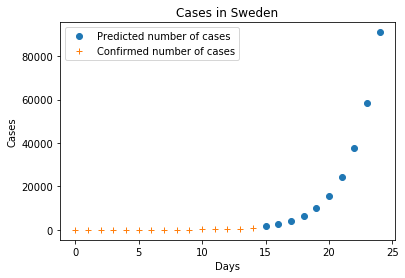

In [13]:
future = list(range(len(confirmed_days), len(confirmed_days)+diff.days))
new_cases = predict_cases(future)
plt.title('Cases in Sweden')
plt.plot(future, new_cases, 'o',label ='Predicted number of cases')
plt.plot(confirmed_days, cum, '+', label = 'Confirmed number of cases')
plt.xlabel('Days')
plt.ylabel('Cases')
plt.legend()
plt.show()

In [14]:
new_cases[-1]

90952.67540669646